**Tropical Cyclone Freddy**

**ERA5 - data**

Tropical Cyclone Freddy (05.02-15.03) made landfall on February 24th for the second time in the Indian Ocean.

Target: 24.02 
lat: -10, -30
lon: 35, 120 

**Load libraries**

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from datetime import datetime
import sys
import warnings
from glob import glob
import pandas as pd
import netCDF4 as nc
import h5netcdf

**load ERA5**

In [42]:
era =  xr.open_dataset('../data/ERA5/ERA_data_TC_Freddy2.nc')
era

<xarray.Dataset> Size: 490MB
Dimensions:  (lon: 441, time: 156, lat: 81, level: 2)
Coordinates:
  * lon      (lon) float32 2kB 10.0 10.25 10.5 10.75 ... 119.2 119.5 119.8 120.0
  * time     (time) datetime64[ns] 1kB 2023-02-05 ... 2023-03-15T18:00:00
  * lat      (lat) float32 324B -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * level    (level) int32 8B 850 500
Data variables:
    u10      (time, lat, lon) float64 45MB ...
    v10      (time, lat, lon) float64 45MB ...
    msl      (time, lat, lon) float64 45MB ...
    t2m      (time, lat, lon) float64 45MB ...
    d2m      (time, lat, lon) float64 45MB ...
    sp       (time, lat, lon) float64 45MB ...
    tp       (time, lat, lon) float64 45MB ...
    u        (time, level, lat, lon) float32 45MB ...
    v        (time, level, lat, lon) float32 45MB ...
    z        (time, level, lat, lon) float32 45MB ...
    q        (time, level, lat, lon) float32 45MB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu Nov 16 10:53:03 2023: cdo -t ecmwf -chname,longitude,lo...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

**Variables in ERA5**

- **u10**: 10mwind in x direction
- **v10**
- **msl**: mean sea level pressure
- **t2m**:  2 meter temperature
- **d2m**:  2 meter dewpoint temperature
- **u**: u wind component ?at surface lvl?
- **v**
- **z**
- **q**: specific humidity


**2D plot of variable with fixed time**

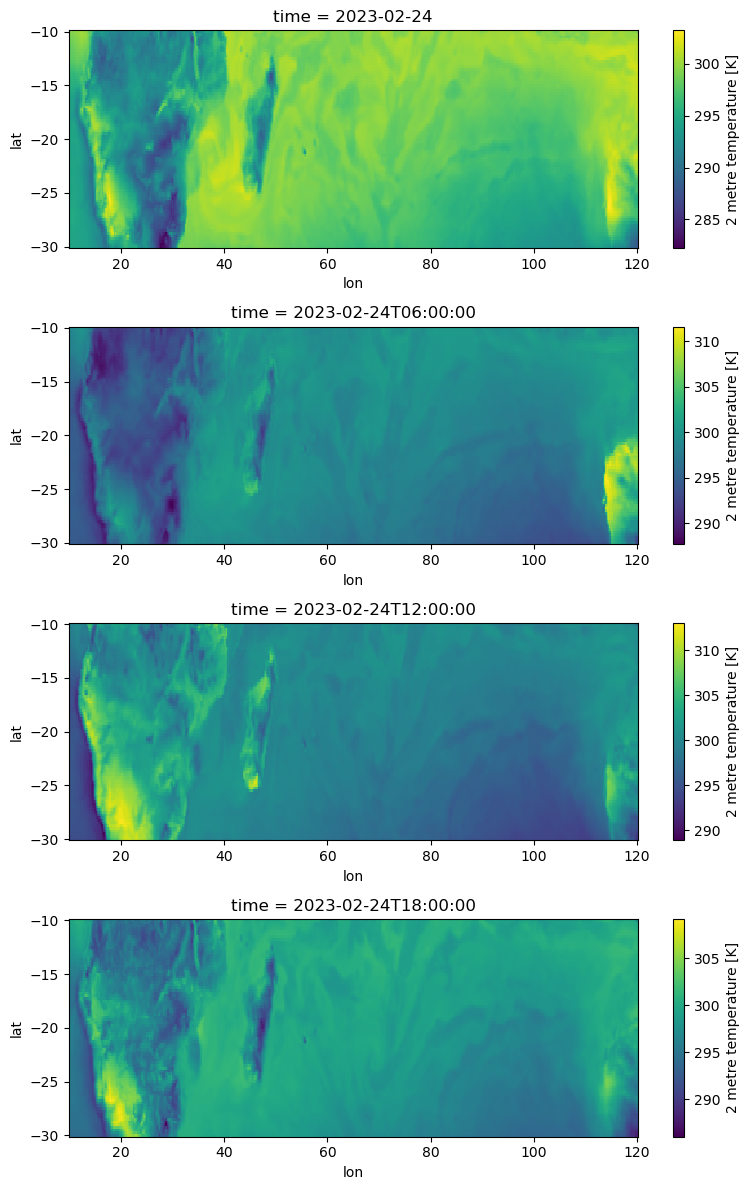

In [26]:
# 4 plots
fig, axs = plt.subplots(nrows=4, figsize=(8,12))

# select times of 2 meter temperature
era.t2m.sel(time="2023-02-24T00:00:00.000000000").plot(ax=axs[0])
era.t2m.sel(time="2023-02-24T06:00:00.000000000").plot(ax=axs[1])
era.t2m.sel(time="2023-02-24T12:00:00.000000000").plot(ax=axs[2])
era.t2m.sel(time="2023-02-24T18:00:00.000000000").plot(ax=axs[3])

for ax in axs:
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")

plt.tight_layout()
plt.draw()
plt.show()


**1D plot of fixed point over time**

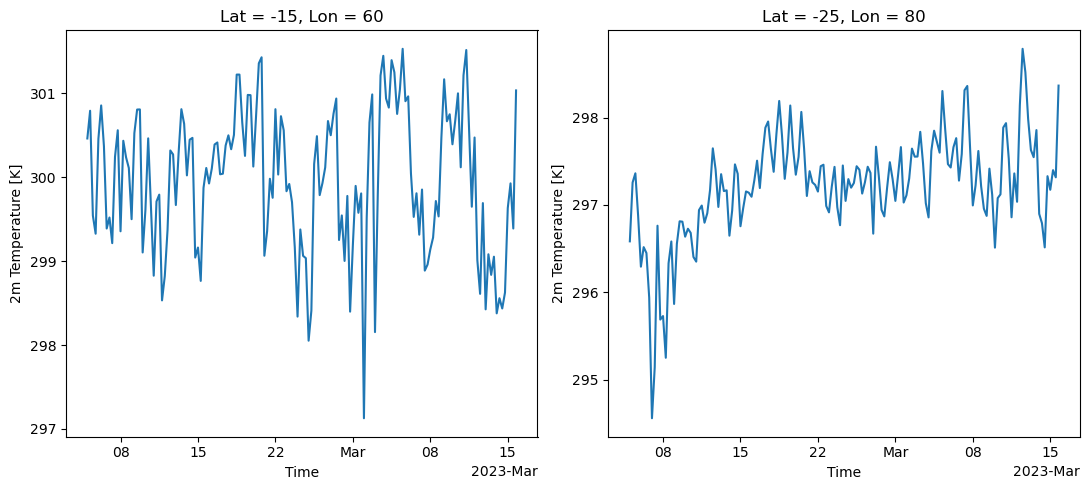

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(11, 5))

era.t2m.sel(lat=-15, lon=60).plot(ax=axs[0])
era.t2m.sel(lat=-25, lon=80).plot(ax=axs[1])

axs[0].set_xlabel("Time")
axs[0].set_ylabel("2m Temperature [K]")
axs[0].set_title("Lat = -15, Lon = 60")

axs[1].set_xlabel("Time")
axs[1].set_ylabel("2m Temperature [K]")
axs[1].set_title("Lat = -25, Lon = 80")

plt.tight_layout()
plt.show()

**Global Plots**

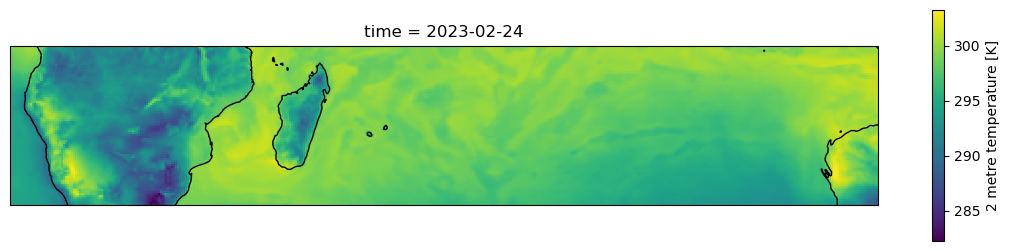

In [40]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

####--------------------------------------
# Create a figure instance
fig = plt.figure(figsize=(14,3))

# map and data projection are both in rectangular grid
map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)

p = era.t2m.sel(time="2023-02-24T00:00:00.000000000").plot(
    ax=ax,
    transform=ccrs.PlateCarree(),  # this is important!
    #cbar_kwargs={"orientation": "vertical", "shrink": 0.7, "label": "deg K"},
    #robust=True, # set colorbar limits to 2nd and 98th percentile of data
)

ax.add_feature(cfeature.COASTLINE, linestyle='-');

plt.show()